In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=acc5e0ce55159aff1dbb7c9397fe6c50f1443ddf2662e3f0ec6d4b6920e14b19
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl




In [ ]:
# Defining fuzzy variables for temperature and fan speed
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 401, 1), 'fan_speed')

In [ ]:
# Membership functions for temperature
temperature['excellent'] = fuzz.trimf(temperature.universe, [0, 50, 70])
temperature['average'] = fuzz.trimf(temperature.universe, [50, 70, 80])
temperature['risky'] = fuzz.trimf(temperature.universe, [70, 80, 100])

# Membership functions for fan speed
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['moderate'] = fuzz.trimf(fan_speed.universe, [100, 200, 300])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [200, 300, 400])


In [ ]:
# Defining fuzzy rules
rule1 = ctrl.Rule(temperature['excellent'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['average'], fan_speed['moderate'])
rule3 = ctrl.Rule(temperature['risky'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['average'] & temperature['risky'], fan_speed['high'])

Fan Speed (RPM): 300.0000000000004


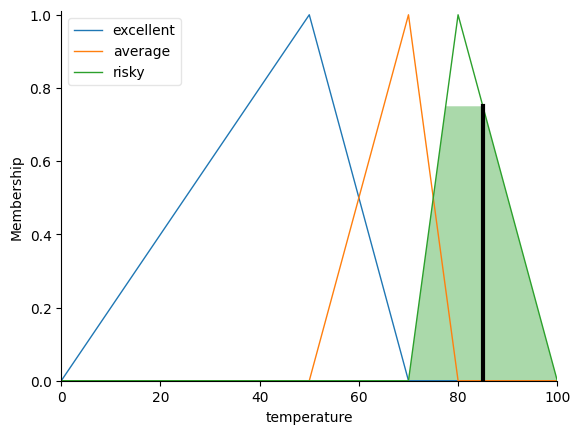

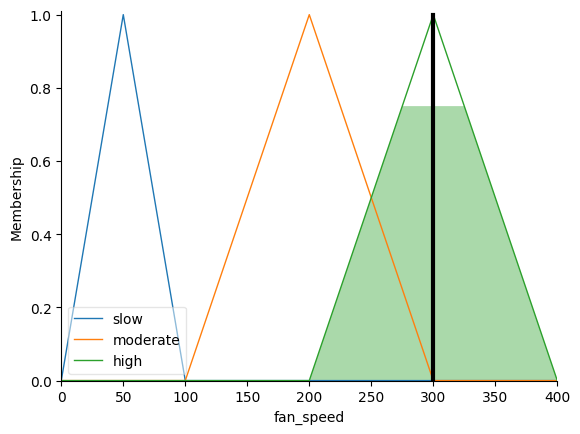

In [ ]:
# Creating a control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

# The temperature value
fan_sim.input['temperature'] = 85  # Example temperature

# Computing the fuzzy output
fan_sim.compute()

# Output the crisp value for fan speed
print(f"Fan Speed (RPM): {fan_sim.output['fan_speed']}")

# Visualizing the results
temperature.view(sim=fan_sim)
fan_speed.view(sim=fan_sim)